In [79]:
#빅데이터_분석&시각화 #미니실습,

# 1. 로지스틱 회귀 분석,
# UCI 정제된 데이터, 유방암 암 진단 데이터를 이용했음.
#
# UCI 다른 데이터 셋을 이용해서, 로지스틱 회귀 분석 해보기.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# 1. 데이터 로드
file_path = "adult.data"  # 경로 설정
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']
data = pd.read_csv(file_path, header=None, names=columns)
print(data.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [81]:
# 2. 'income' 컬럼 값 처리
data['income'] = data['income'].apply(lambda x: 1 if x == ' >50K' else 0)

# 3. 전처리 (문자열을 숫자로 변환)
data = pd.get_dummies(data, drop_first=True)

# 4. 특성(X)과 목표 변수(y) 분리
X = data.drop('income', axis=1)
y = data['income']
print(X.head())
print(y.head())

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                   False                 False                    False   
1                   False                 False                    False   
2                   False                 False                    False   
3                   False                 False                    False   
4                   False                 False                    False   

   workclass_ Private  ...  native_country_ Portugal  \
0               False  .

In [82]:
# 5. 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
# 6. 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 로지스틱 회귀 모델 훈련
model = LogisticRegression(solver='liblinear', max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

In [84]:
# 8. 예측
y_pred = model.predict(X_test_scaled)

# 9. 정확도, 혼동 행렬, classification_report
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
conf_matrix = confusion_matrix(y_test, y_pred)  # 혼동 행렬 계산
class_report = classification_report(y_test, y_pred)  # classification report 계산

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8549055734684478
Confusion Matrix:
[[4598  347]
 [ 598  970]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



Precision: 0.7365223993925588
Recall: 0.6186224489795918
F1 Score: 0.6724436741767764
ROC AUC Score: 0.7742252790904026


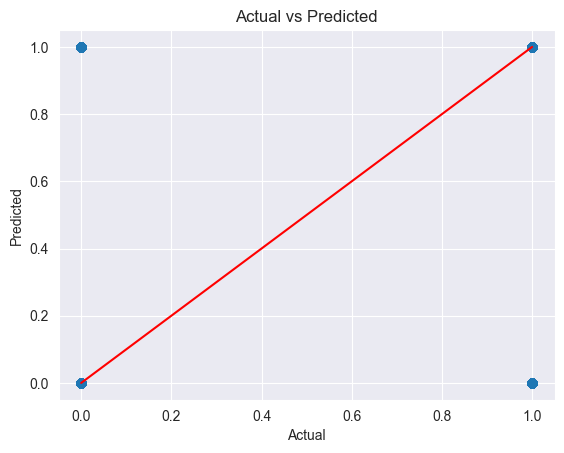

In [85]:
# 10. 정확도, 정밀도, 재현율, F1 스코어 등 추가 지표 출력
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# 11. 시각화 (예측 값 vs 실제 값)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # 완벽한 예측선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()